# Aula 5: Otimização e Combinação de Modelos
## Contraponto entre a Projeção do PCA e do LDA

Este notebook gera a Figura **[FIG_PCA_VS_LDA]**, ilustrando de forma didática e visual a diferença fundamental entre as abordagens de Redução de Dimensionalidade do **Principal Component Analysis (PCA)** e do **Linear Discriminant Analysis (LDA)**. 
Enquanto o PCA é não supervisionado e busca a direção de maior variância global (acabando por misturar as classes), o LDA é supervisionado e busca ativamente a direção matemática que maximiza a separabilidade entre as nuvens de dados.

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# --- 1. CONFIGURAÇÕES DE IDENTIDADE VISUAL (PALETA GRAN) ---
COR_AZUL_PRINCIPAL = "#0D134C"
COR_VERMELHO = "#DD303E"
COR_PRETO = "#000000"
COR_BRANCO = "#FFFFFF"
FUNDO_EIXOS = "#F9F9F9"

# --- 2. CONFIGURAÇÕES DE TIPOGRAFIA (OTIMIZADO PARA PDF) ---
FONT_LABEL = 20
FONT_TICK = 18
FONT_SUBFIGURE = 24

# Aplicação do tema base do Seaborn e Fundo dos Eixos institucionais
sns.set_theme(style="whitegrid", rc={"axes.facecolor": FUNDO_EIXOS})

# Forçando o uso de fontes compatíveis com glifos matemáticos
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

## Geração de Dados Sintéticos e Modelagem
Para criar um efeito visual dramático que facilite a percepção do aluno, modelaremos duas nuvens de pontos (vermelha e azul) formando elipses alongadas paralelamente à diagonal principal ($y = x$). Suas médias, no entanto, estarão separadas através da diagonal oposta ($y = -x$).
Dessa forma, forçamos o PCA a errar (capturando o alongamento das elipses) e o LDA a acertar (capturando a distância entre as médias).

In [2]:
# --- 3. GERAÇÃO DE DADOS SINTÉTICOS ---
# Fixando a semente (Efeito didático extremo e reproduzível)
np.random.seed(28)
N = 150

# Matriz de covariância para gerar nuvens fortemente ovaladas na diagonal
cov = [[6.0, 5.5], 
       [5.5, 6.0]]

# Gerando a Classe 0 (Azul) e a Classe 1 (Vermelha)
# As médias são posicionadas em quadrantes opostos para o contraponto
X_azul = np.random.multivariate_normal([-1.5, 1.5], cov, N)
X_verm = np.random.multivariate_normal([1.5, -1.5], cov, N)

X = np.vstack((X_azul, X_verm))
y = np.hstack((np.zeros(N), np.ones(N)))

# --- CÁLCULO DO PCA (Não Supervisionado) ---
pca = PCA(n_components=1)
pca.fit(X)
v_pca = pca.components_[0]

# Projeção escalar de todos os pontos no eixo encontrado pelo PCA
X_pca_azul = X_azul.dot(v_pca)
X_pca_verm = X_verm.dot(v_pca)


# --- CÁLCULO DO LDA (Supervisionado) ---
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(X, y)
v_lda = lda.coef_[0]

# Normalizando o vetor diretor do LDA para realizar a projeção geométrica corretamente
v_lda_unit = v_lda / np.linalg.norm(v_lda)

# Projeção escalar de todos os pontos no eixo encontrado pelo LDA
X_lda_azul = X_azul.dot(v_lda_unit)
X_lda_verm = X_verm.dot(v_lda_unit)

## Geração da Figura Comparativa (4 Gráficos)
Dividiremos a tela em quatro eixos simulando o efeito de causa e consequência:
- **Acima (a, b)**: O espaço original bidimensional onde desenhamos as setas (eixos) encontrados pelos algoritmos.
- **Abaixo (c, d)**: O gráfico de densidade de probabilidade (KDE) da nuvem quando projetada no seu respectivo eixo. Demonstra visualmente a confusão das classes no PCA e o isolamento limpo no LDA.

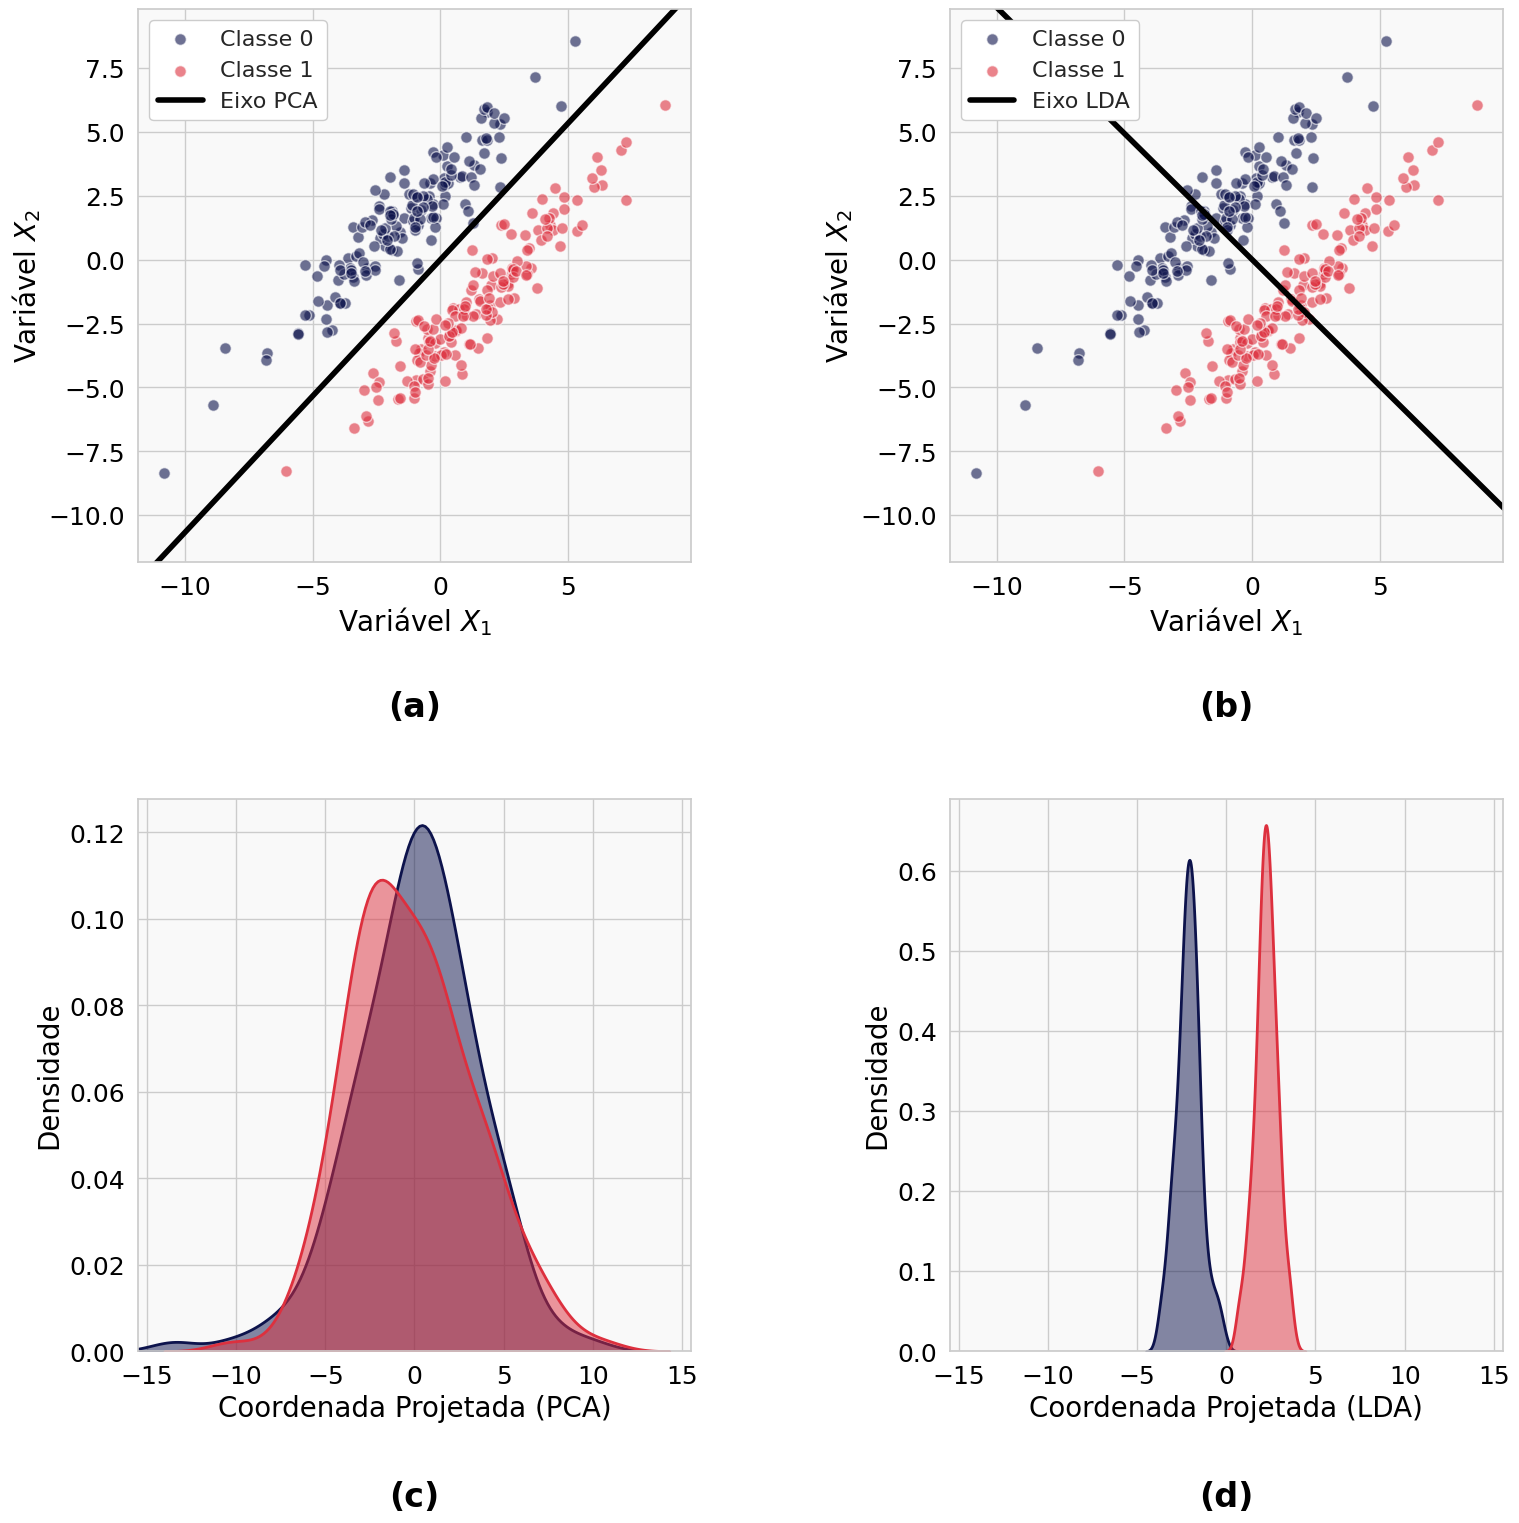

In [7]:
# --- 4. CONFIGURAÇÃO DA FIGURA ---
fig, axs = plt.subplots(2, 2, figsize=(16, 16))

# Calculando limites min e max de todo o conjunto de dados para os eixos (com respiro)
min_xy = np.min(X) - 1
max_xy = np.max(X) + 1

# Constante de tamanho para as linhas indicativas alongada para garantir cruzamento total
t = np.linspace(min_xy * 2, max_xy * 2, 100)

# ==========================================
# EIXO (a): Espaço 2D e o Eixo do PCA
# ==========================================
ax_pca_2d = axs[0, 0]
ax_pca_2d.scatter(X_azul[:, 0], X_azul[:, 1], color=COR_AZUL_PRINCIPAL, alpha=0.6, s=70, edgecolor=COR_BRANCO, label='Classe 0')
ax_pca_2d.scatter(X_verm[:, 0], X_verm[:, 1], color=COR_VERMELHO, alpha=0.6, s=70, edgecolor=COR_BRANCO, label='Classe 1')

# Reta do Componente Principal cruzando o plot por inteiro
linha_pca = t[:, np.newaxis] * v_pca
ax_pca_2d.plot(linha_pca[:, 0], linha_pca[:, 1], color=COR_PRETO, linewidth=4, label='Eixo PCA')

# Travando os limites do plot
ax_pca_2d.set_xlim(min_xy, max_xy)
ax_pca_2d.set_ylim(min_xy, max_xy)

ax_pca_2d.set_xlabel('Variável $X_1$', fontsize=FONT_LABEL, color=COR_PRETO)
ax_pca_2d.set_ylabel('Variável $X_2$', fontsize=FONT_LABEL, color=COR_PRETO)
ax_pca_2d.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)

# Ajuste da Legenda: Reposicionamento para área vazia e Fundo 100% Sólido
ax_pca_2d.legend(fontsize=FONT_TICK-2, loc='upper left', framealpha=1.0, facecolor=COR_BRANCO)

ax_pca_2d.text(0.5, -0.28, '(a)', transform=ax_pca_2d.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE, color=COR_PRETO)
ax_pca_2d.set_box_aspect(1)


# ==========================================
# EIXO (b): Espaço 2D e o Eixo do LDA
# ==========================================
ax_lda_2d = axs[0, 1]
ax_lda_2d.scatter(X_azul[:, 0], X_azul[:, 1], color=COR_AZUL_PRINCIPAL, alpha=0.6, s=70, edgecolor=COR_BRANCO, label='Classe 0')
ax_lda_2d.scatter(X_verm[:, 0], X_verm[:, 1], color=COR_VERMELHO, alpha=0.6, s=70, edgecolor=COR_BRANCO, label='Classe 1')

# Reta Discriminante Linear cruzando o plot por inteiro
linha_lda = t[:, np.newaxis] * v_lda_unit
ax_lda_2d.plot(linha_lda[:, 0], linha_lda[:, 1], color=COR_PRETO, linewidth=4, label='Eixo LDA')

# Travando os limites do plot
ax_lda_2d.set_xlim(min_xy, max_xy)
ax_lda_2d.set_ylim(min_xy, max_xy)

ax_lda_2d.set_xlabel('Variável $X_1$', fontsize=FONT_LABEL, color=COR_PRETO)
ax_lda_2d.set_ylabel('Variável $X_2$', fontsize=FONT_LABEL, color=COR_PRETO)
ax_lda_2d.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)

# Ajuste da Legenda: Reposicionamento para área vazia e Fundo 100% Sólido
ax_lda_2d.legend(fontsize=FONT_TICK-2, loc='upper left', framealpha=1.0, facecolor=COR_BRANCO)

ax_lda_2d.text(0.5, -0.28, '(b)', transform=ax_lda_2d.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE, color=COR_PRETO)
ax_lda_2d.set_box_aspect(1)


# ==========================================
# EIXO (c): Resultado Final da Projeção 1D PCA
# ==========================================
ax_pca_1d = axs[1, 0]
sns.kdeplot(X_pca_azul, ax=ax_pca_1d, fill=True, color=COR_AZUL_PRINCIPAL, alpha=0.5, linewidth=2, label='Classe 0')
sns.kdeplot(X_pca_verm, ax=ax_pca_1d, fill=True, color=COR_VERMELHO, alpha=0.5, linewidth=2, label='Classe 1')

ax_pca_1d.set_xlabel('Coordenada Projetada (PCA)', fontsize=FONT_LABEL, color=COR_PRETO)
ax_pca_1d.set_ylabel('Densidade', fontsize=FONT_LABEL, color=COR_PRETO)
ax_pca_1d.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)

ax_pca_1d.text(0.5, -0.28, '(c)', transform=ax_pca_1d.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE, color=COR_PRETO)
ax_pca_1d.set_box_aspect(1)


# ==========================================
# EIXO (d): Resultado Final da Projeção 1D LDA
# ==========================================
ax_lda_1d = axs[1, 1]
sns.kdeplot(X_lda_azul, ax=ax_lda_1d, fill=True, color=COR_AZUL_PRINCIPAL, alpha=0.5, linewidth=2, label='Classe 0')
sns.kdeplot(X_lda_verm, ax=ax_lda_1d, fill=True, color=COR_VERMELHO, alpha=0.5, linewidth=2, label='Classe 1')

ax_lda_1d.set_xlabel('Coordenada Projetada (LDA)', fontsize=FONT_LABEL, color=COR_PRETO)
ax_lda_1d.set_ylabel('Densidade', fontsize=FONT_LABEL, color=COR_PRETO)
ax_lda_1d.tick_params(axis='both', labelsize=FONT_TICK, colors=COR_PRETO)

ax_lda_1d.text(0.5, -0.28, '(d)', transform=ax_lda_1d.transAxes, ha='center', fontweight='bold', fontsize=FONT_SUBFIGURE, color=COR_PRETO)
ax_lda_1d.set_box_aspect(1)

# Limitações de eixo X para garantir simetria visual absoluta entre o eixo (c) e (d)
xlim_max = max(np.abs(X_pca_azul).max(), np.abs(X_lda_azul).max()) + 2
ax_pca_1d.set_xlim(-xlim_max, xlim_max)
ax_lda_1d.set_xlim(-xlim_max, xlim_max)


# --- 5. AJUSTES DE DIAGRAMAÇÃO E EXPORTAÇÃO ---
plt.tight_layout(w_pad=4.0, h_pad=5.0)
fig.subplots_adjust(bottom=0.15)

caminho_save = os.path.join('..', 'outputs', 'figures', 'aula_05')
os.makedirs(caminho_save, exist_ok=True)

plt.savefig(
    os.path.join(caminho_save, '05_figura_pca_vs_lda.png'), 
    dpi=300, 
    bbox_inches='tight', 
    pad_inches=0.4
)

plt.show()